# Scientific Computing 

## Question 1
### Part A

In [3]:
from CommonModules import *
import ODESolver

In [4]:
def Bruselator(x,t,B,A=1):
    dxdt = A +(x[0]**2)*x[1] -(B+1)*x[0]
    dydt = B*x[0]-(x[0]**2)*x[1]
    return np.array([dxdt,dydt])


<>:11: SyntaxWarning: invalid escape sequence '\i'
<>:11: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13352\1626699057.py:11: SyntaxWarning: invalid escape sequence '\i'
  plt.title(f" Brusselator Time Series \n  ICs={InitialConditions},B=3,over T$ \in ${TimeSpan}")


Text(0.5, 1.0, ' Brusselator Time Series \n  ICs=(1, 1),B=3,over T$ \\in $(0, 20)')

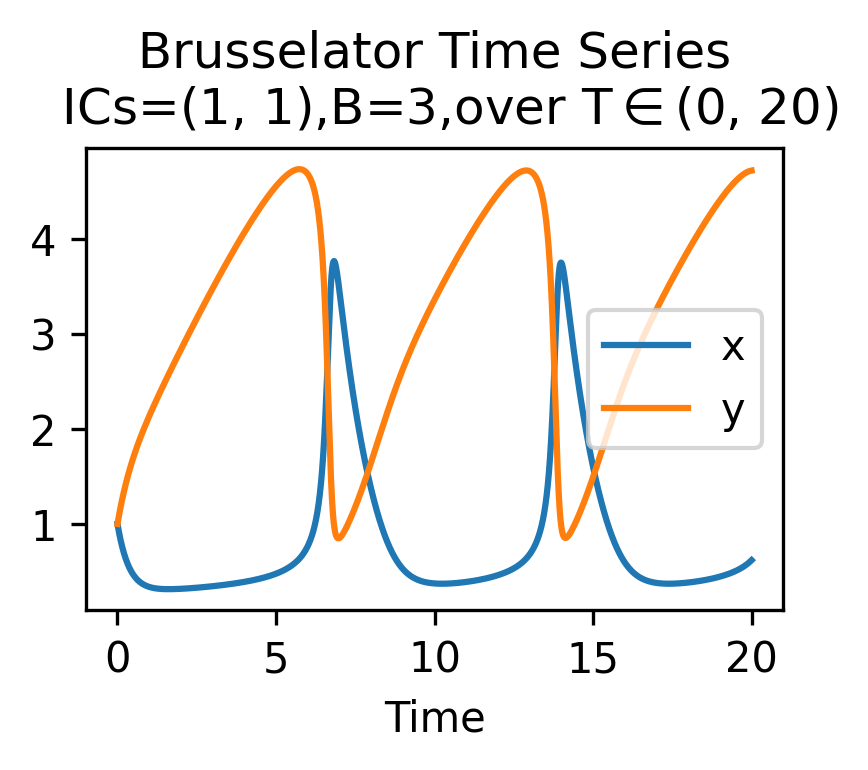

In [5]:
InitialConditions = (1,1)
TimeSpan = (0,20)
BruselatorAtThree = lambda x,t: Bruselator(x,t,B=3)
XY, Time = ODESolver.Solve_to(BruselatorAtThree,InitialConditions,TimeSpan)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XY[0,:],label="x")
plt.plot(Time,XY[1,:],label="y")
plt.legend()
plt.xlabel("Time")

plt.title(f" Brusselator Time Series \n  ICs={InitialConditions},B=3,over T$ \in ${TimeSpan}")

> Small note: the SyntaxWarning comes from cpython misidentifying latex, the code still runs as expected

As seen from the above graph, the system enters a limit cycle with a period of $\approx6$ with a turning point at $x\approx4$ and $y\approx1$

### Part B

Text(0.5, 1.0, ' Two cycles of the Brusselator system \n Period=7.16')

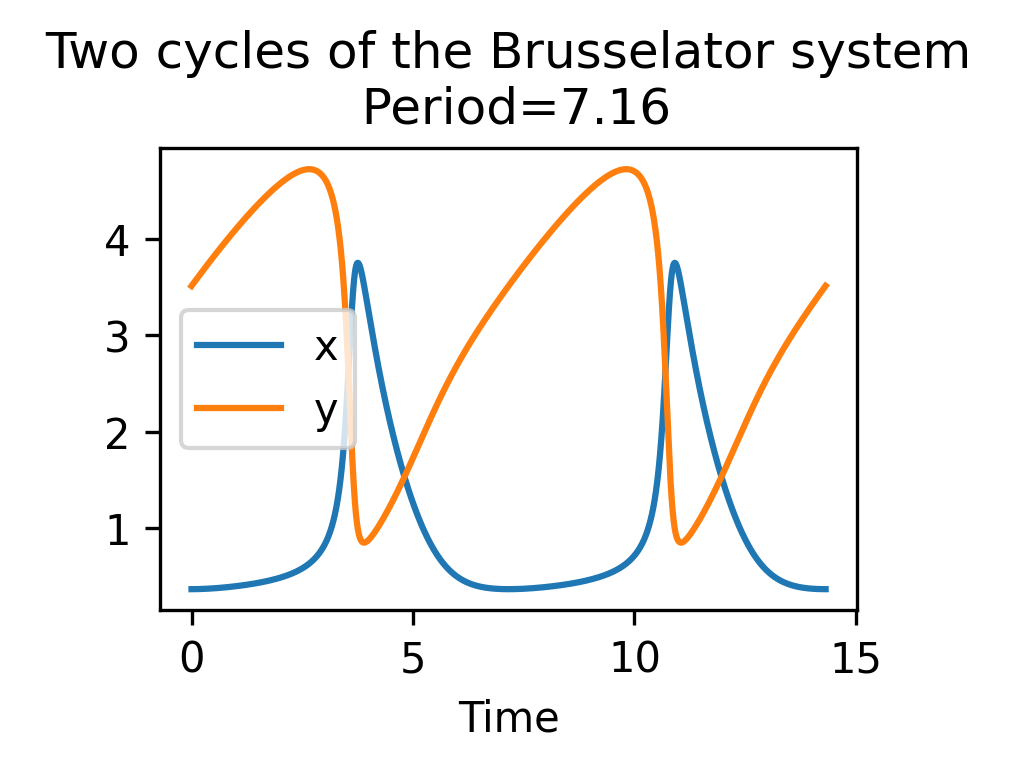

In [6]:
import Week16General
GuessTimePeriod = 6
GuessICs = (4,1)
CycleXY,CyclePeriod = Week16General.Shooting(BruselatorAtThree,GuessICs,GuessTimePeriod)

#InitialConditions = (
#TimeSpan = (0,20)
CycleTwoPeriods = (0,CyclePeriod*2)

BruselatorAtThree = lambda x,t: Bruselator(x,t,B=3)
XY, Time = ODESolver.Solve_to(BruselatorAtThree,CycleXY,CycleTwoPeriods)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XY[0,:],label="x")
plt.plot(Time,XY[1,:],label="y")
plt.legend()
plt.xlabel("Time")

plt.title(f" Two cycles of the Brusselator system \n Period={CyclePeriod:.2f}")





As shown above, the system has a period of approximately 7.16 

In [38]:
import Week17Continuation
InitialConditions = np.hstack((CycleXY,CyclePeriod))
SolnXYT,BValues = Week17Continuation.NaturalContinuation(Bruselator,InitialConditions
                                                        ,Param0=3,ParamStepSize=-0.05
                                                        ,ParamNSteps = 20
                                                        ,SolverStepSize = 0.01
                                                        ,WithShooting=1)

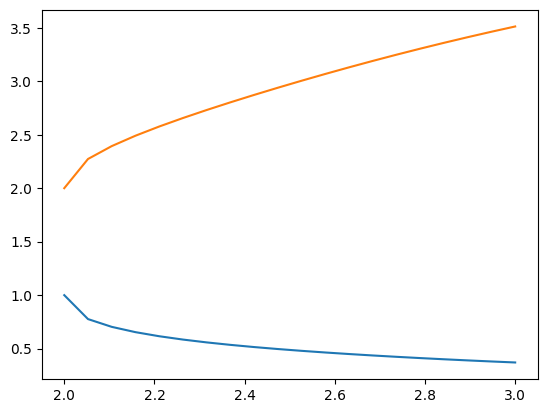

In [39]:
plt.plot(BValues,SolnXYT[:,:-1])


In [42]:
"""Working forwards from 2"""
NewICs = np.hstack((SolnXYT[-1,:-1],0.01))
NewParam0 = BValues[-1]
NewSolnXYT,NewBValues = Week17Continuation.NaturalContinuation(Bruselator,NewICs
                                                        ,Param0=NewParam0,ParamStepSize=0.1
                                                        ,ParamNSteps = 10
                                                        ,SolverStepSize = 0.0001
                                                        ,WithShooting=1)

To find the fixed points of the bifurcations I tried to use a much lower time period, finding fixed arms that match exactly with $y=B$, $x=1$. I imagine this bottom line being equal to 1 is also connected to the value of A. Dotted lines in the below plot are not a comment on stability and simply used to distinguish the two

Text(0, 0.5, 'Position of $x_*$ $&$ $y_*$')

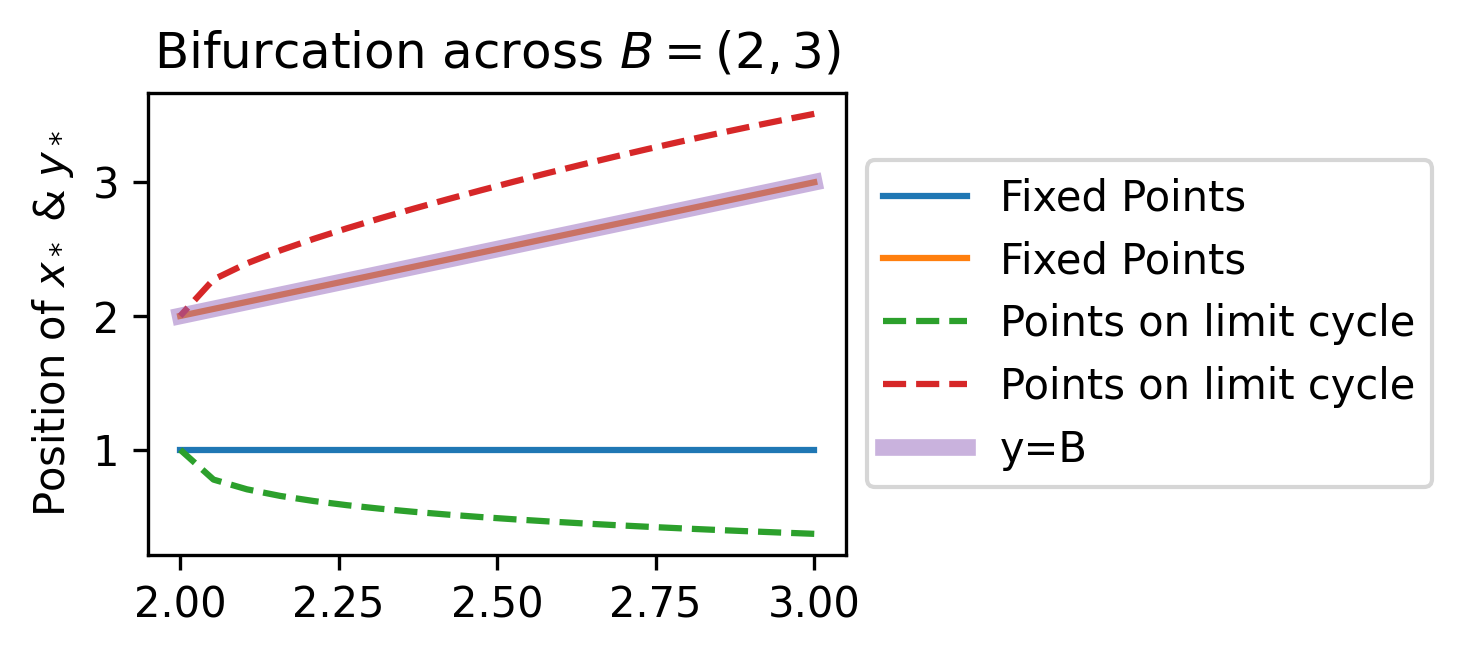

In [48]:
plt.figure(figsize=(3,2),dpi=300)
plt.plot(NewBValues,NewSolnXYT[:,:-1],label="Fixed Points")
plt.plot(BValues,SolnXYT[:,:-1],linestyle='--',label="Points on limit cycle")
plt.plot(BValues,BValues,label="y=B",linewidth=4,alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Bifurcation across $B=(2,3)$")
plt.ylabel("Position of $x_*$ $&$ $y_*$")
plt.xlabel("Value of B")

## Question 2
### Part A


In [51]:
def ExtendedHopf(xyz,t,Beta=1):
    R = xyz[0]**2+xyz[1]**2+xyz[2]**2
    dx = Beta*xyz[0] -xyz[1] -xyz[2] +xyz[0]*R -xyz[0]*(R**2)
    dy = xyz[0] +Beta*xyz[1] -xyz[2] +xyz[1]*R -xyz[1]*(R**2)
    dz = xyz[0] +xyz[1] +Beta*xyz[2] +xyz[2]*R -xyz[2]*(R**2)
    return np.array([dx,dy,dz])



In [76]:
InitialConditions = (1,0,-1)
TimeSpan = (0,10)
XYZ ,Time = ODESolver.Solve_to(ExtendedHopf,InitialConditions,TimeSpan)


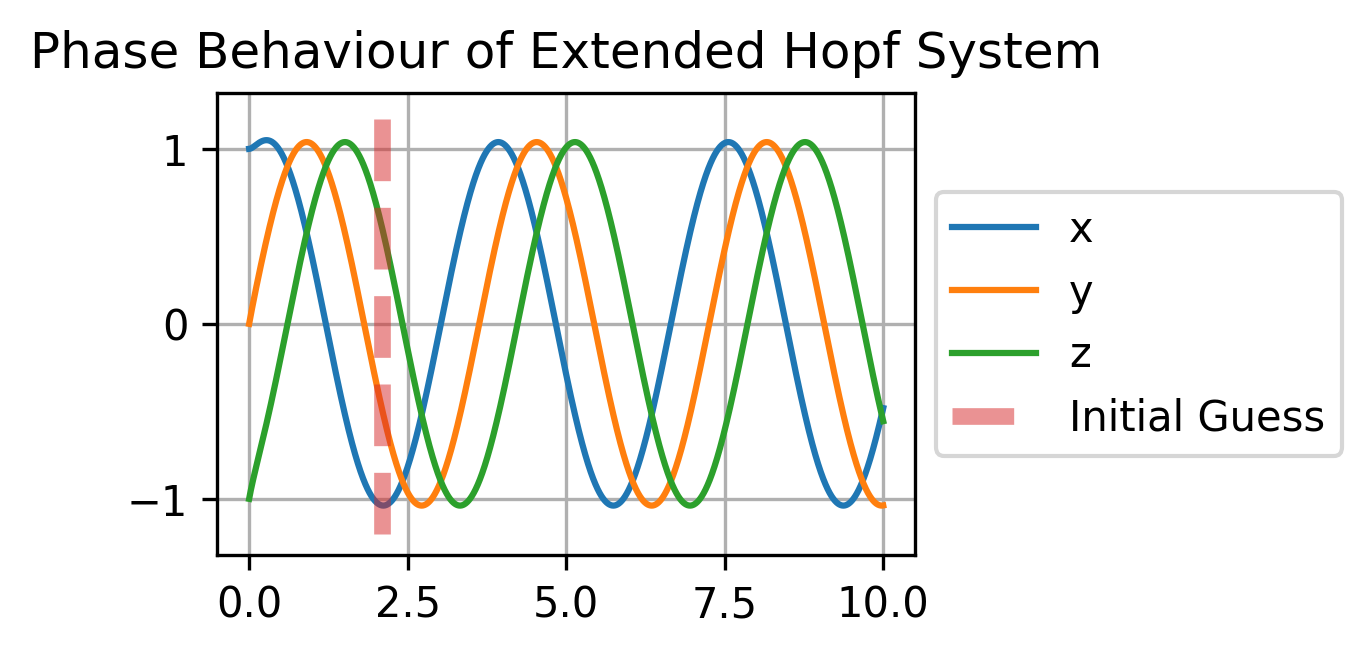

In [63]:
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XYZ.T,label=("x","y","z"))
plt.plot((2.1,2.1),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,label="Initial Guess")
plt.title("Phase Behaviour of Extended Hopf System")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Part B
From the above plot I expect a limit cycle at $(x,y,z)\approx (-1,-0.4,0.5)$ with a period of $T\approx4$

This system has an oscilation period of 3.63


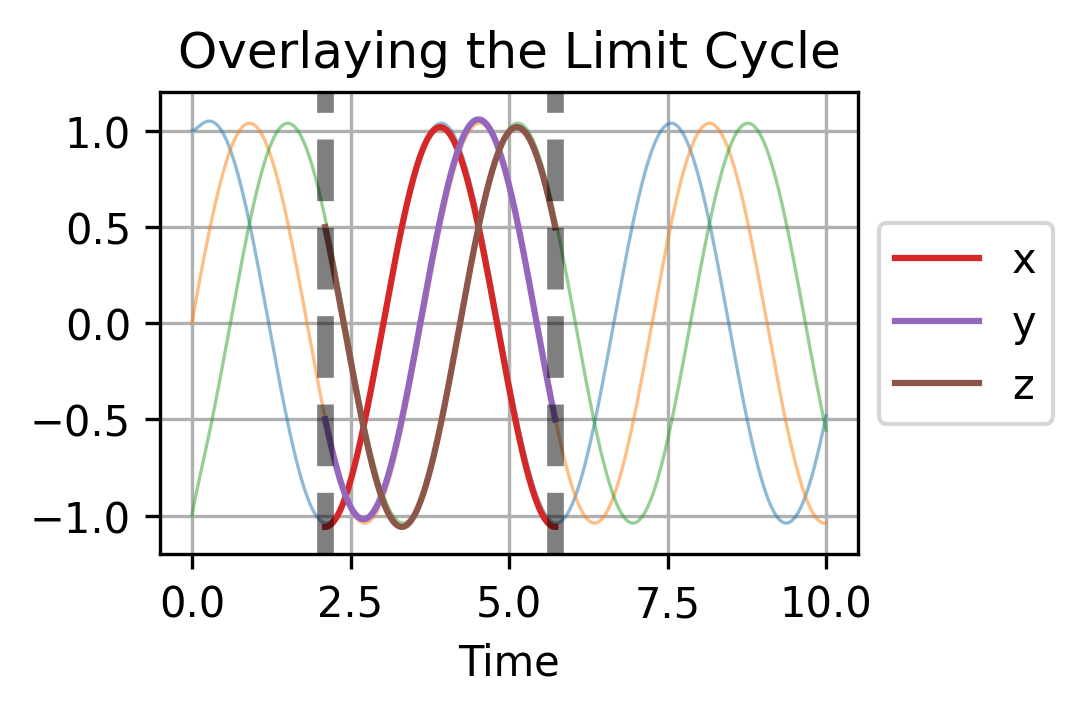

In [86]:
GuessXYZ = (-1,-0.5,0.5)
GuessT = 3.9

CycleXYZ ,CycleT = Week16General.Shooting(ExtendedHopf,GuessXYZ,GuessT)
NewXYZ,NewTime = ODESolver.Solve_to(ExtendedHopf,CycleXYZ,(0,CycleT))
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XYZ.T,alpha=0.5,linewidth=0.8)
plt.plot(NewTime+2.1,NewXYZ.T,label=("x","y","z"))
plt.plot((2.1,2.1),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,color='k')
plt.plot((2.1+CycleT,2.1+CycleT),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,color='k')
plt.title("Overlaying the Limit Cycle")
plt.ylim((-1.2,1.2))
plt.xlabel("Time")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(f"This system has an oscilation period of {CycleT:.2f}")

> Time Period = 3.63 for x,y,z = -1,-0.5,0.5
### Part C

In [88]:
InitialConditions = np.hstack(CycleXYZ,CycleT)
SolnXYT,ParameterValues = Week17Continuation.ShootingArcLengthCont(
    ExtendedHopf,InitialConditions,(1,-1),ContinuationMax
)

[-1.05821192 -0.49910997  0.49910997]
